In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

## SAAF PI Check

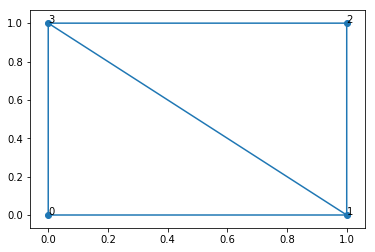

In [4]:
x = np.array([0, 1, 1, 0])
y = np.array([0, 0, 1, 1])
triangles = np.array([[3, 0, 1], [1, 2, 3]])
triangulation = tri.Triangulation(x, y, triangles=triangles)
plt.triplot(triangulation)
plt.scatter(x, y, marker='o')
for i in range(4):
    plt.annotate(i, (x[i], y[i]))
plt.show()

## Problem Set Up 
$\Omega = [.5773503, .5773503], \sigma_t = 1, \frac{1}{\sigma_t} = 1, \nu\sigma_f = 1$

In [5]:
def compute_collapsed_fission(phi, nusigf):
    interp = tri.LinearTriInterpolator(triangulation, phi) 
    area = .5
    collapsed_fission = 0
    ### Element 0
    ### Integrate phi by gaussian quadrature 1/3*Area*[f(0, .5) + f(.5, 0) + f(.5, .5)]
    phi_integral = 1/3*area*(interp(0, .5) + interp(.5, 0) + interp(.5, .5))
    collapsed_fission += nusigf*phi_integral
    
    ### Element 1
    ### Integrate phi by gaussian quadrature 1/3*Area*[f(1, .5) + f(.5, 1) + f(.5, .5)]
    phi_integral = 1/3*area*(interp(1, .5) + interp(.5, 1) + interp(.5, .5))
    collapsed_fission += nusigf*phi_integral
    
    return collapsed_fission

In [12]:
def make_fission_source(angles, phi, sigt, chi, nusigf):
    interp = tri.LinearTriInterpolator(triangulation, phi)
    b = np.zeros(4)
    # Element 0
    ## basis coefficients x, y, c
    basis3 = np.array([0, 1, 0])
    basis0 = np.array([-1, -1, 1])
    basis1 = np.array([1, 0, 0])
    gauss_nodes = np.array([[0, .5, 1],
                            [.5, 0, 1],
                            [.5, .5, 1]])
    grad3 = np.array([0, 1])
    grad0 = np.array([-1, -1])
    grad1 = np.array([1, 0])
    area = .5
    # Node 3
    first_integral = 1/3*area*(interp(0, .5)*np.dot(basis3, gauss_nodes[0]) +
                              interp(.5, 0)*np.dot(basis3, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis3, gauss_nodes[2]))
    b[3] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(0, .5)*np.dot(angles, grad3) +
                               interp(.5, 0)*np.dot(angles, grad3) +
                               interp(.5, .5)*np.dot(angles, grad3))
    b[3] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)
    # Node 0 
    first_integral = 1/3*area*(interp(0, .5)*np.dot(basis0, gauss_nodes[0]) +
                              interp(.5, 0)*np.dot(basis0, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis0, gauss_nodes[2]))
    b[0] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(0, .5)*np.dot(angles, grad0) +
                               interp(.5, 0)*np.dot(angles, grad0) +
                               interp(.5, .5)*np.dot(angles, grad0))
    b[0] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)
    # Node 1 
    first_integral = 1/3*area*(interp(0, .5)*np.dot(basis1, gauss_nodes[0]) +
                              interp(.5, 0)*np.dot(basis1, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis1, gauss_nodes[2]))
    b[1] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(0, .5)*np.dot(angles, grad1) +
                               interp(.5, 0)*np.dot(angles, grad1) +
                               interp(.5, .5)*np.dot(angles, grad1))
    b[1] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)
    # Element 1
    grad1 = np.array([0, -1])
    grad2 = np.array([1, 1])
    grad3 = np.array([-1, 0])
    basis1 = np.array([0, -1, 1])
    basis2 = np.array([1, 1, -1])
    basis3 = np.array([-1, 0, 1])
    gauss_nodes = np.array([[1, .5, 1],
                            [.5, 1, 1],
                            [.5, .5, 1]])
    # Node 1
    first_integral = 1/3*area*(interp(1, .5)*np.dot(basis1, gauss_nodes[0]) +
                              interp(.5, 1)*np.dot(basis1, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis1, gauss_nodes[2]))
    b[1] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(1, .5)*np.dot(angles, grad1) +
                               interp(.5, 1)*np.dot(angles, grad1) +
                               interp(.5, .5)*np.dot(angles, grad1))
    b[1] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)
    # Node 2
    first_integral = 1/3*area*(interp(1, .5)*np.dot(basis2, gauss_nodes[0]) +
                              interp(.5, 1)*np.dot(basis2, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis2, gauss_nodes[2]))
    b[2] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(1, .5)*np.dot(angles, grad2) +
                               interp(.5, 1)*np.dot(angles, grad2) +
                               interp(.5, .5)*np.dot(angles, grad2))
    b[2] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)
    # Node 3
    first_integral = 1/3*area*(interp(1, .5)*np.dot(basis3, gauss_nodes[0]) +
                              interp(.5, 1)*np.dot(basis3, gauss_nodes[1]) +
                              interp(.5, .5)*np.dot(basis3, gauss_nodes[2]))
    b[3] += chi*nusigf*first_integral/(4*np.pi)
    second_integral = 1/3*area*(interp(1, .5)*np.dot(angles, grad3) +
                               interp(.5, 1)*np.dot(angles, grad3) +
                               interp(.5, .5)*np.dot(angles, grad3))
    b[3] += 1/sigt*chi*nusigf*second_integral/(4*np.pi)

    return b

In [13]:
phi = np.ones(4)
nusigf = 1
compute_collapsed_fission(phi, nusigf)

1.0

In [14]:
sigt = 2
chi = 1
nusigf = 1
angles = np.array([.5773503,.5773503])
make_fission_source(angles, phi, sigt, chi, nusigf)

array([-0.00970913,  0.02652582,  0.03623495,  0.02652582])